In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('final_dataset.csv')

Convert Dates

In [8]:
df['Date_full'] = pd.to_datetime({
    'year': df['Year'],
    'month': df['Month'],
    'day': df['Date']
})

Plot AQI vs Time

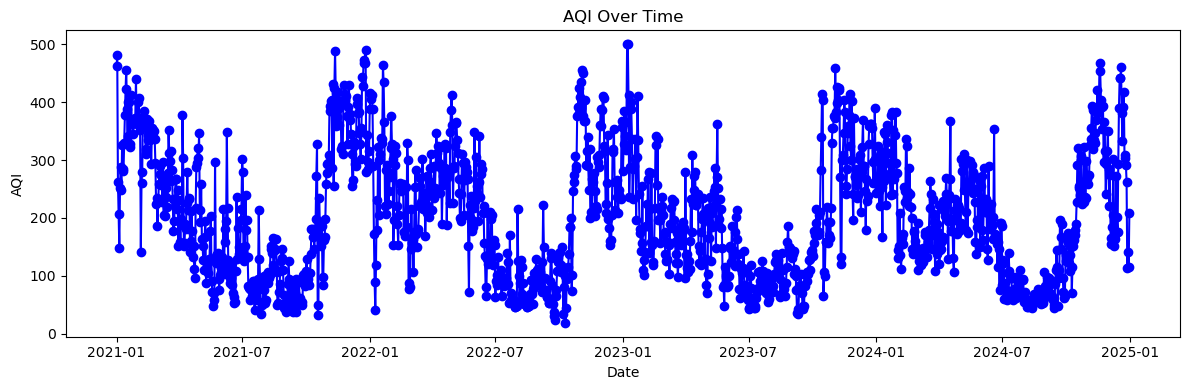

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date_full'], df['AQI'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Over Time')
plt.tight_layout()
plt.show()

Plot Avg AQI for each Month

Years in dataset: [2021, 2022, 2023, 2024]


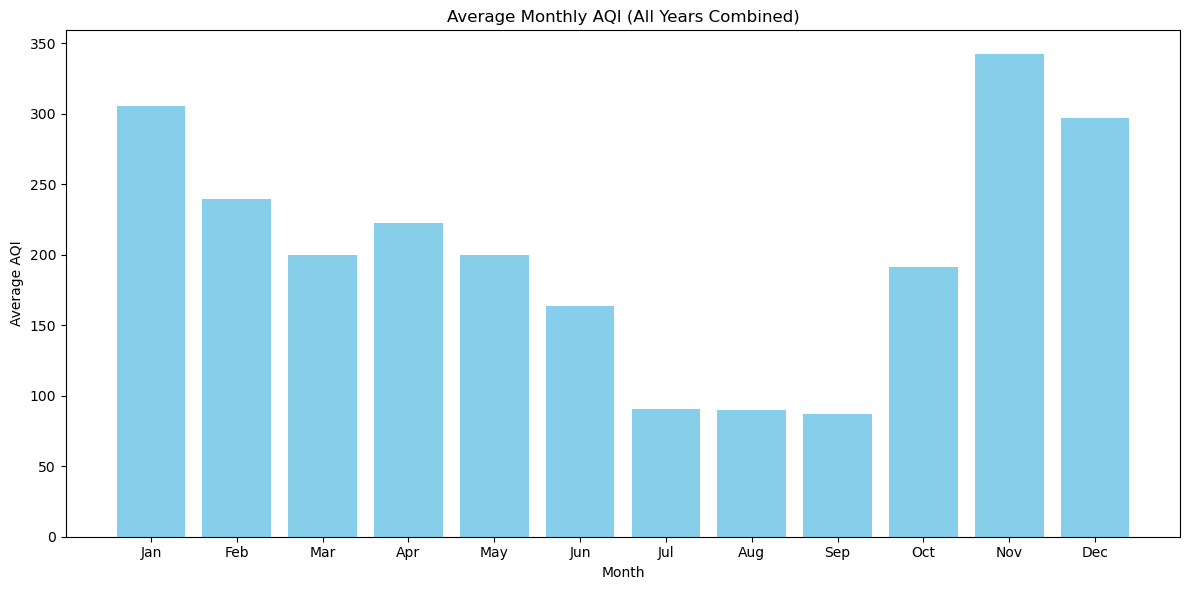

In [10]:
# Print the years in the dataset
print("Years in dataset:", sorted(df['Year'].unique()))

# Calculate monthly averages across all years
monthly_avg = df.groupby('Month')['AQI'].mean()

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(12), monthly_avg.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.title('Average Monthly AQI (All Years Combined)')

# Set month names on x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_names)
plt.tight_layout()

# Save the plot
plt.savefig('monthly_aqi_all_years.png', dpi=300, bbox_inches='tight')
plt.show()

# If you want to see a specific year, uncomment and modify these lines:
# year = 2021  # Change this to the year you want to see
# year_data = df[df['Year'] == year]
# monthly_avg_year = year_data.groupby('Month')['AQI'].mean()
# plt.figure(figsize=(12, 6))
# plt.bar(range(12), monthly_avg_year.values, color='skyblue')
# plt.title(f'Average Monthly AQI for {year}')

This plot shows the average AQI values for each month, combining data from all years in the dataset. To see which years are included, check the print output above.

# Statistical Analysis of AQI Data
- Analyze trends and patterns
- Calculate correlations between different pollutants
- Test for seasonal variations
- Identify significant changes over years

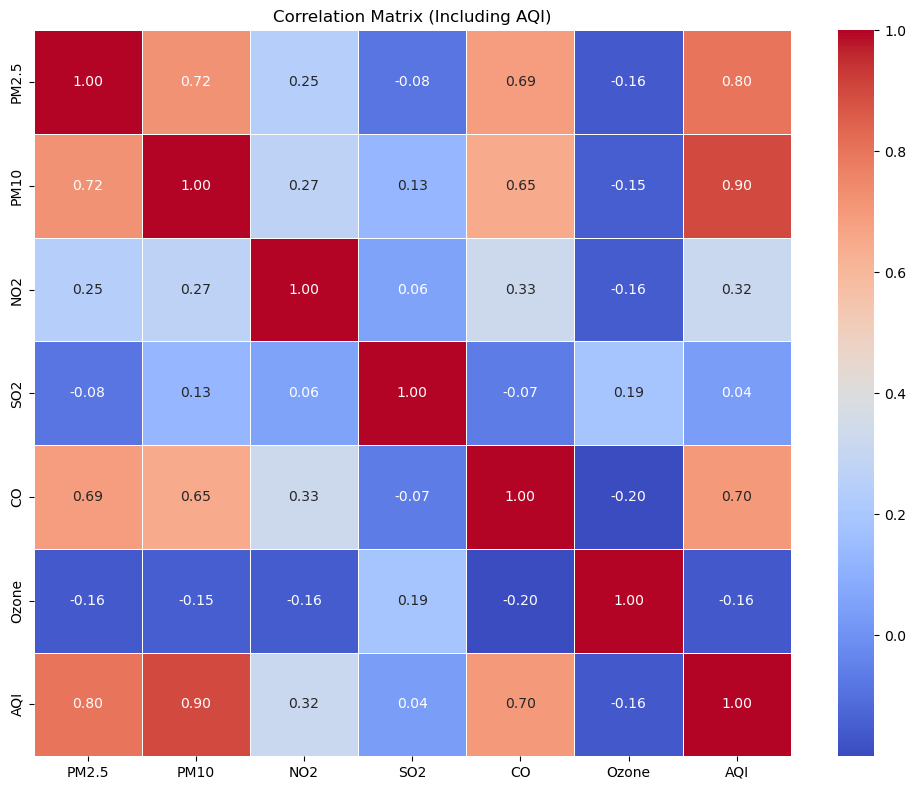


Statistical Summary of Pollutants and AQI:
             PM2.5         PM10          NO2          SO2           CO  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     90.774538   218.219261    37.184921    20.104921     1.025832   
std      71.650579   129.297734    35.225327    16.543659     0.608305   
min       0.050000     9.690000     2.160000     1.210000     0.270000   
25%      41.280000   115.110000    17.280000     7.710000     0.610000   
50%      72.060000   199.800000    30.490000    15.430000     0.850000   
75%     118.500000   297.750000    45.010000    26.620000     1.240000   
max    1000.000000  1000.000000   433.980000   113.400000     4.700000   

             Ozone          AQI  
count  1461.000000  1461.000000  
mean     36.338871   202.210815  
std      18.951204   107.801076  
min       2.700000    19.000000  
25%      24.100000   108.000000  
50%      32.470000   189.000000  
75%      45.730000   284.000000  
max     115.87000

In [11]:
# Calculate correlations including AQI
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
correlation_matrix = df[pollutants + ['AQI']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix (Including AQI)')
plt.tight_layout()
plt.show()

# Basic statistical summary
print("\nStatistical Summary of Pollutants and AQI:")
print(df[pollutants + ['AQI']].describe())